In [13]:
#import modules
import numpy as np
import operator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AirI.csv', sep = ' ', header = None)

In [3]:
data.shape

(111, 512)

## Which gives the highest validity ##

In [4]:
x = data.loc[:,'1':'503'].values
y = data[0].values

In [5]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)
scale = StandardScaler()
poly = PolynomialFeatures(degree=1)

In [6]:
pipe = Pipeline([['Scaler',scale],['Polynomial Features',poly]])

In [22]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(140,160,101)
for i in a_range:
    model = Ridge(alpha=i)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 151.000


In [9]:
# for the Ridge model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Ridge Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.97081691225671
The external validation R2 score is : 0.6143955028178116
The optimal alpha for the Ridge Model is 151.000


In [10]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(.01,.3,101)
for i in a_range:
    model = Lasso(alpha=i)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 0.074


In [11]:
# for the Lasso Linear model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the Lasso Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.8440043580156292
The external validation R2 score is : 0.5955890426205233
The optimal alpha for the Lasso Model is 0.074


In [12]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(0.01,2,101)
for i in a_range:
    model = ElasticNet(alpha=i)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 0.149


In [13]:
# for the EN model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the EN Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.8378634790229776
The external validation R2 score is : 0.5913973595452386
The optimal alpha for the EN Model is 0.149


In [16]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
# we need the actual cross- validations
score = []
score_tr = []
score_te = []


a_range = np.linspace(0.1,.3,101)
for eps in a_range:
    model = SVR(kernel='linear',C=1,epsilon=eps)
    score_train = []
    score_test = []
    
    for idxtrain, idxtest in kf.split(x):
        xtrain = x[idxtrain]
        xtest = x[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        # here we apply the pipeline
        xpolytrain = pipe.fit_transform(xtrain)
        xpolytest = pipe.transform(xtest)
        model.fit(xpolytrain,ytrain)
        score_train.append(model.score(xpolytrain,ytrain))
        score_test.append(model.score(xpolytest,ytest))
    score.append(np.abs(np.mean(score_train) - np.mean(score_test)))
    score_tr.append(np.mean(score_train))
    score_te.append(np.mean(score_test))
idx = np.argmax(score_te)
print('Optimal alpha value: ' + format(a_range[idx], '.3f')) 

Optimal alpha value: 0.148


In [8]:
# for the SVR model
print('The internal validation R2 score is : ' +str(score_tr[idx]))
print('The external validation R2 score is : ' +str(score_te[idx]))
print('The optimal alpha for the SVR Model is ' + str(format(a_range[idx], '.3f')))

The internal validation R2 score is : 0.9762675565842086
The external validation R2 score is : 0.6058290001193631
The optimal alpha for the SVR Model is 0.148


In [18]:
ytest.shape

(11,)

ValueError: x and y must be the same size

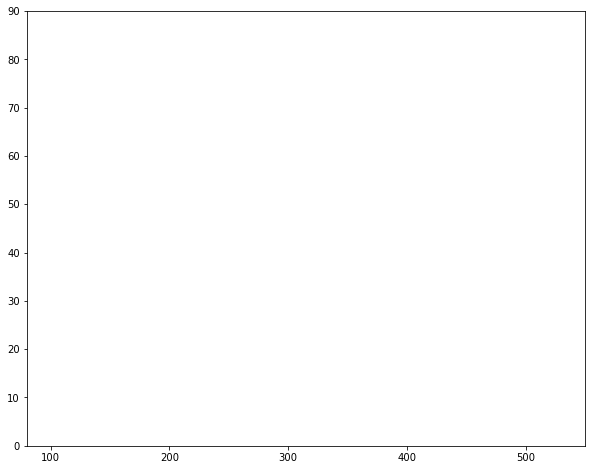

In [16]:
# Plot outputs
# for meaningful plotting we need the x to be ordered
dat = np.column_stack([xtest,ytest])
dat_sorted = dat[dat[:,0].argsort(),:]
xtest_sorted = dat_sorted[:,0].reshape(-1,1)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(80, 550)
ax.set_ylim(0, 90)
ax.scatter(xtest, ytest,s=25,color='deepskyblue',ec='navy',alpha=0.5)
ax.plot(xtest_sorted, model.predict(xtest_sorted), color='red')
ax.plot(xtest_sorted, model.predict(xtest_sorted)+eps, color='orange')
ax.plot(xtest_sorted, model.predict(xtest_sorted)-eps, color='orange')
ax.set_xlabel('Features',fontsize=14,color='darkgreen')
ax.set_ylabel('Target',fontsize=14,color='darkgreen')
ax.set_title('SVR Predictions',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

## Transpose and Determinant ##

In [39]:
x = data.loc[:,'1':'503'].values

In [40]:
x.shape

(111, 503)

In [41]:
x2 = np.transpose(x)
x2.shape

(503, 111)

In [42]:
multi = np.matmul(x2, x)

In [43]:
np.linalg.det(multi)

0.0

Object `fitted_svr_model.predict` not found.
